# BOSTON HOUSING ANALYSIS

## AIM

Determine which factors are significant in housing prices.

In [131]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

    CRIM - per capita crime rate by town
    ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
    INDUS - proportion of non-retail business acres per town.
    CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    NOX - nitric oxides concentration (parts per 10 million)
    RM - average number of rooms per dwelling
    AGE - proportion of owner-occupied units built prior to 1940
    DIS - weighted distances to five Boston employment centres
    RAD - index of accessibility to radial highways
    TAX - full-value property-tax rate per $10,000
    PTRATIO - pupil-teacher ratio by town
    B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    LSTAT - % lower status of the population
    MEDV - Median value of owner-occupied homes in $1000's


In [4]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df0 = pd.read_csv("housing.xls", header=None, delimiter=r"\s+", names=column_names)

In [5]:
df = df0.copy()

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
df.shape

(506, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [28]:
df.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [9]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [27]:
df.duplicated().sum()

0

In [11]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


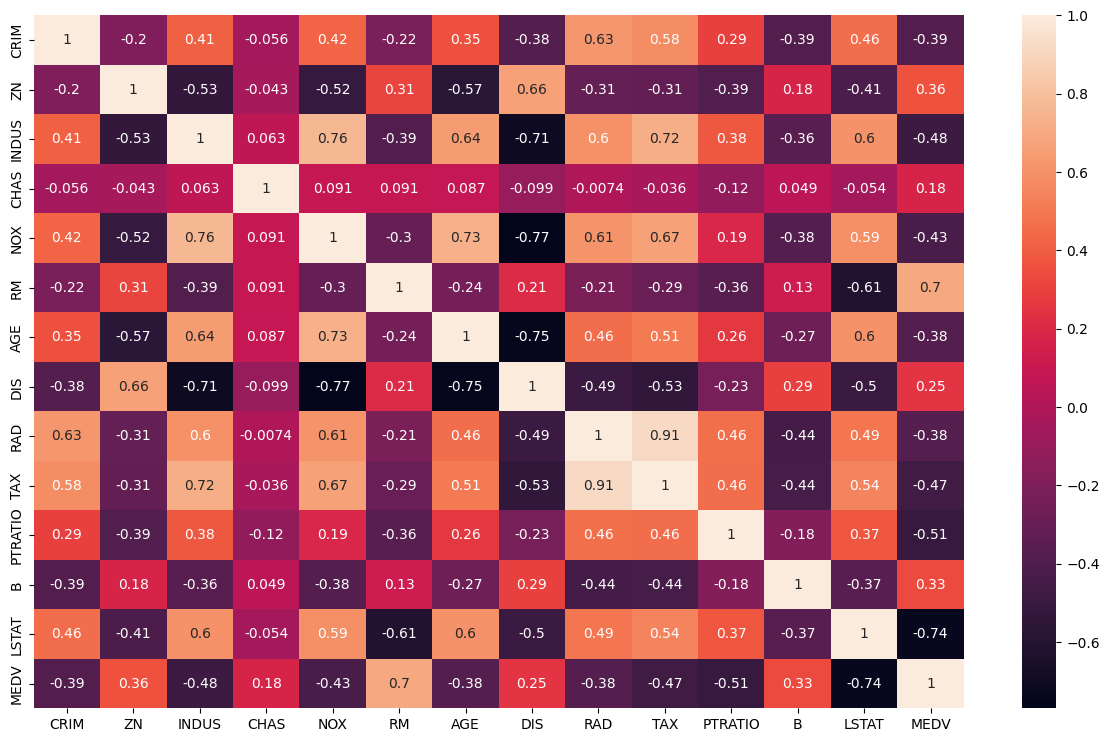

In [123]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(numeric_only="TRUE"), annot=True);

In [32]:
df.corr()[["MEDV"]].drop("MEDV")

,MEDV
CRIM,-0.388305
ZN,0.360445
INDUS,-0.483725
CHAS,0.175260
NOX,-0.427321
RM,0.695360
AGE,-0.376955
DIS,0.249929
RAD,-0.381626
TAX,-0.468536


<Axes: >

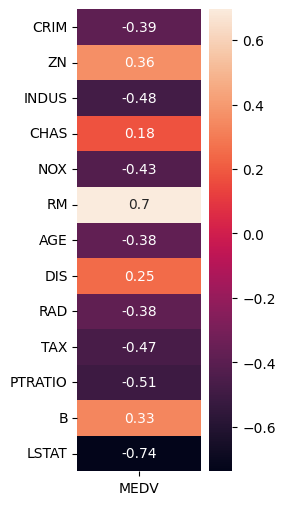

In [33]:
plt.figure(figsize=(2,6))
sns.heatmap(df.corr()[["MEDV"]].drop("MEDV"), annot=True)

In [12]:
df.MEDV.value_counts()

MEDV
50.0    16
25.0     8
22.0     7
21.7     7
23.1     7
        ..
32.9     1
34.6     1
30.3     1
33.3     1
8.1      1
Name: count, Length: 229, dtype: int64

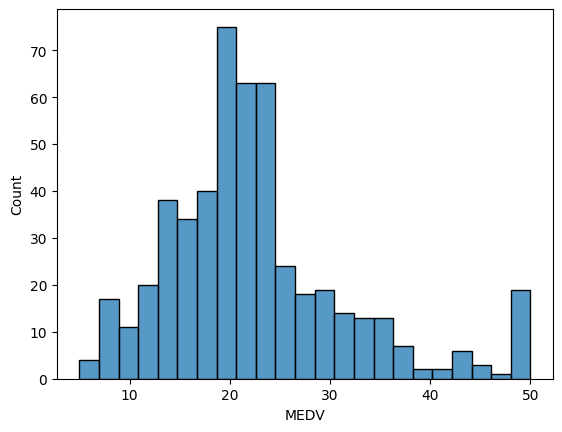

In [18]:
sns.histplot(data=df, x="MEDV");

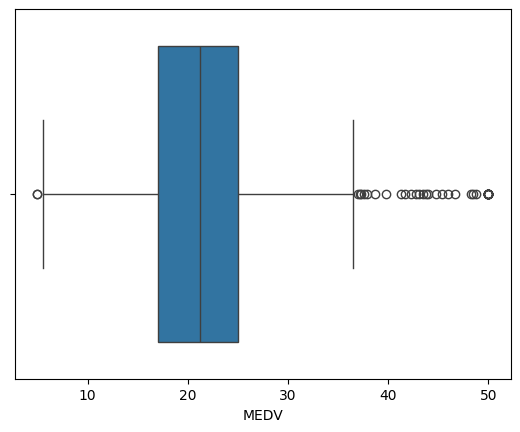

In [19]:
sns.boxplot(data=df, x="MEDV");

House prices are mostly concentrated between the range of 18000 and 25000
There is a peak at the price 50.000 and it seems like an outlier, however by domain knowledge we know that it is the result of censor.
Variable 14-MEDV seems to be censored at 50.00; Censoring is suggested by the fact that the highest median price of exactly $50,000 is reported in 16 cases, while 15 cases have prices between $40,000 and $50,000, with prices rounded to the nearest hundred.
https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

## BIVARIARATE ANALYSIS

### CRIM

In [23]:
df.CRIM.value_counts()

CRIM
0.01501     2
14.33370    2
0.03466     1
0.03113     1
0.03049     1
           ..
1.51902     1
1.83377     1
1.46336     1
1.27346     1
0.04741     1
Name: count, Length: 504, dtype: int64

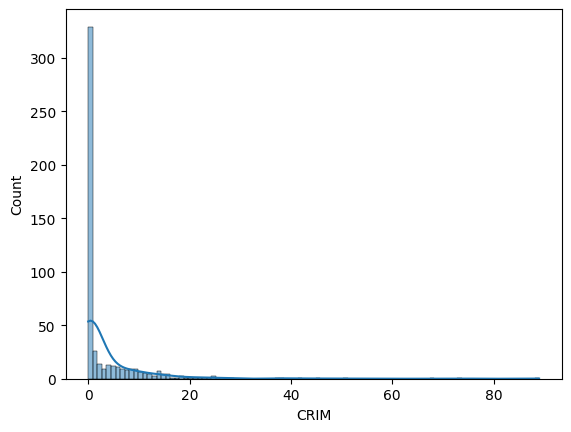

In [126]:
sns.histplot(data=df, x= "CRIM", kde=True);

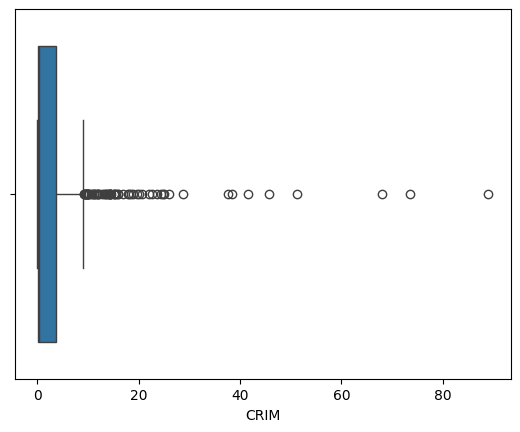

In [25]:
sns.boxplot(data=df, x="CRIM");

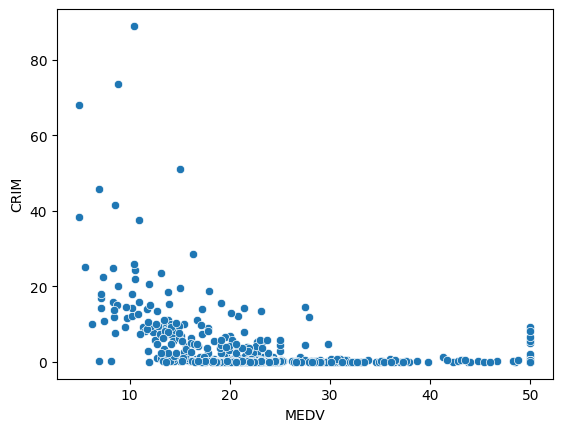

In [14]:
sns.scatterplot(data=df, x="MEDV", y="CRIM");

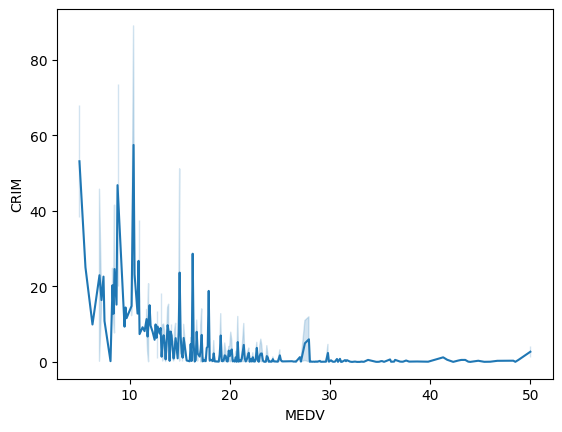

In [15]:
sns.lineplot(data=df, x="MEDV", y="CRIM");

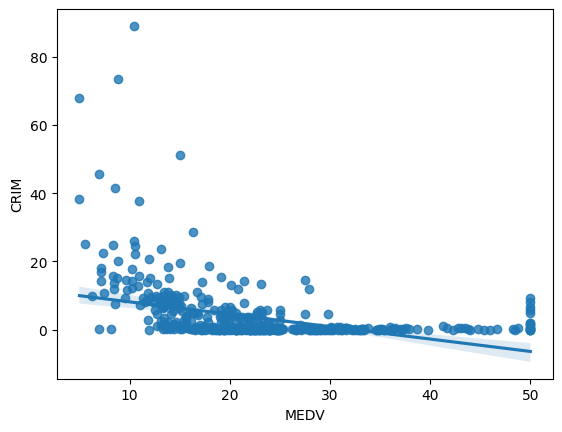

In [127]:
sns.regplot(data=df, x= "MEDV", y="CRIM");

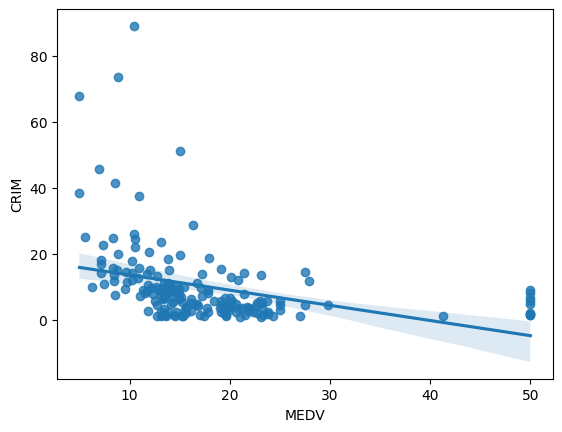

In [130]:
sns.regplot(data=df[df["CRIM"] >= 1], x= "MEDV", y="CRIM");

In [135]:
print("Q1:", (np.percentile(df["CRIM"], 25)))
print("Q2:", (np.percentile(df["CRIM"], 50)))  #q2 is also called median
Q3 = (np.percentile(df["CRIM"], 75))
IQR = (stats.iqr(df["CRIM"]))
print(Q3 + IQR)

Q1: 0.08204499999999999
Q2: 0.25651
7.27212


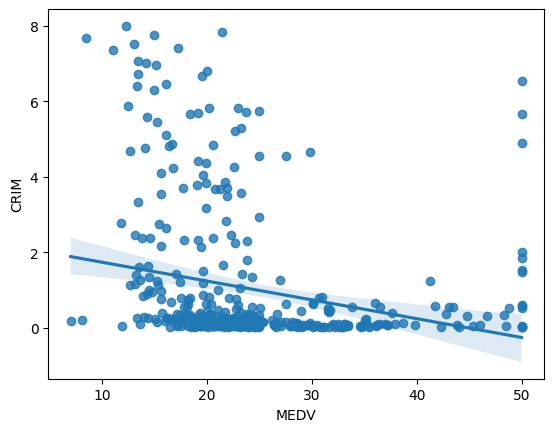

In [139]:
sns.regplot(data=df[df["CRIM"] < 8], x= "MEDV", y="CRIM");

The crime rate is mostly between 0 and 1. There seems to be outliers. However we don't know how many person crime rate is per.
Most of the houses are concentrated near 0 crime rate, so people tend to choose lower crime rate suburbs but the values are so small that we cannot see a significant effect.

## ZN

<Axes: xlabel='ZN'>

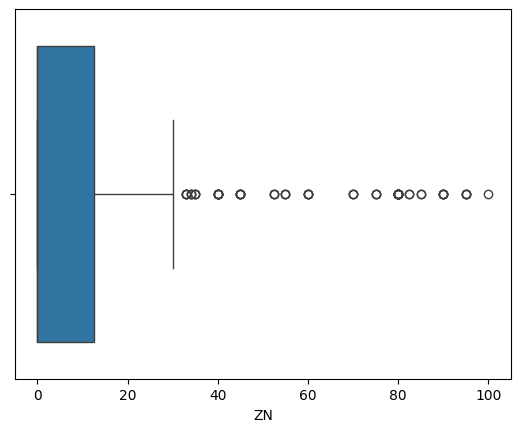

In [35]:
sns.boxplot(data=df, x="ZN")

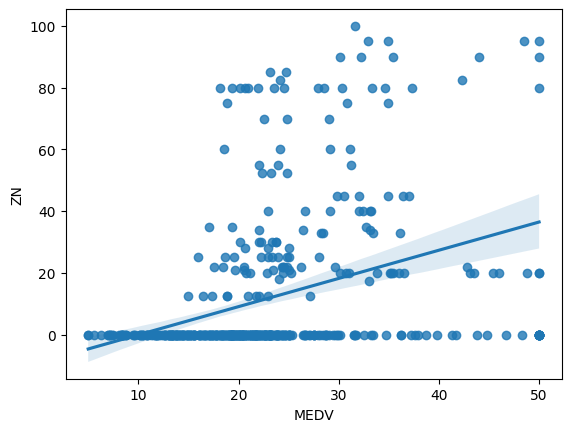

In [38]:
sns.regplot(data=df, x= "MEDV", y="ZN");

In [39]:
df.ZN.value_counts()

ZN
0.0      372
20.0      21
80.0      15
22.0      10
12.5      10
25.0      10
40.0       7
45.0       6
30.0       6
90.0       5
95.0       4
60.0       4
21.0       4
33.0       4
55.0       3
70.0       3
34.0       3
52.5       3
35.0       3
28.0       3
75.0       3
82.5       2
85.0       2
17.5       1
100.0      1
18.0       1
Name: count, dtype: int64

## INDUS

<Axes: xlabel='INDUS'>

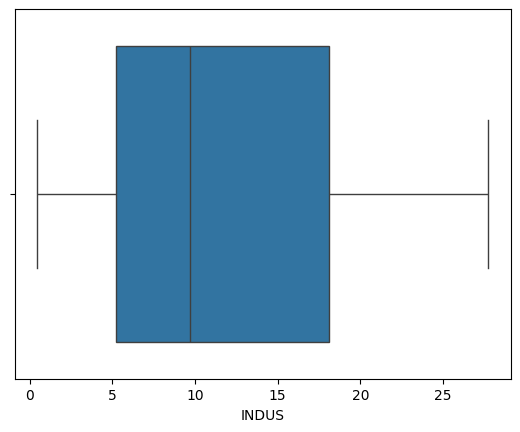

In [40]:
sns.boxplot(data=df, x="INDUS")

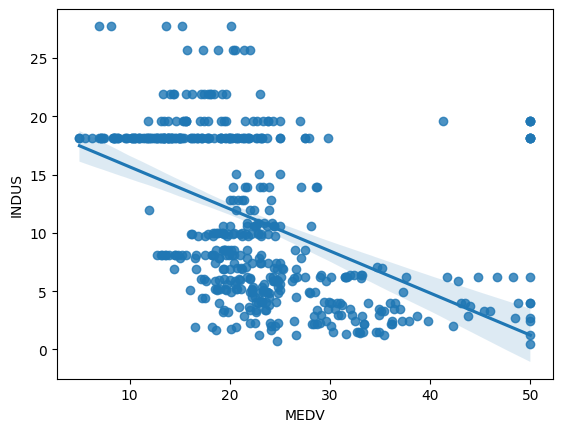

In [41]:
sns.regplot(data=df, x= "MEDV", y="INDUS");

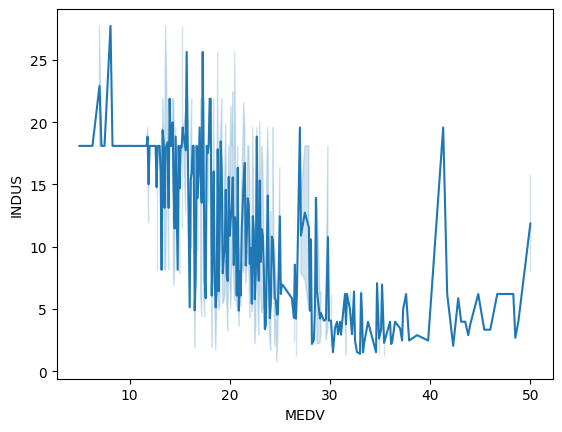

In [42]:
sns.lineplot(data=df, x= "MEDV", y="INDUS");

## CHAS

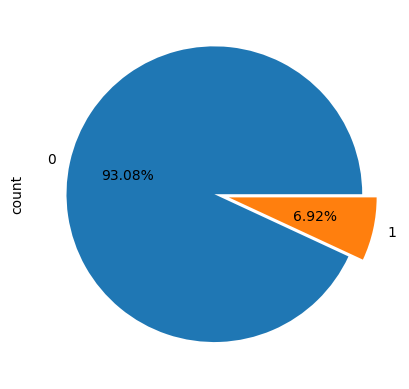

In [49]:
df.CHAS.value_counts().plot.pie(autopct="%.2f%%", explode=[0, 0.1]);

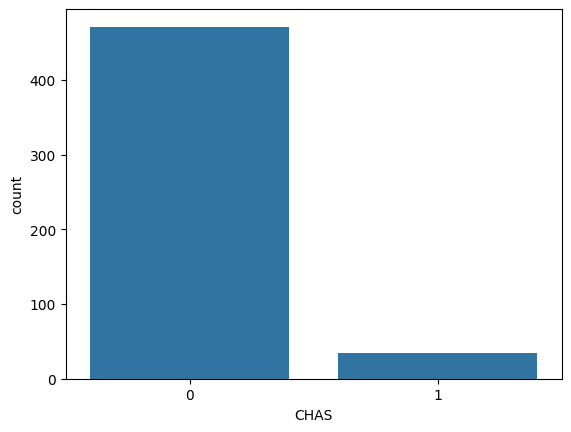

In [47]:
sns.countplot(data=df, x="CHAS");

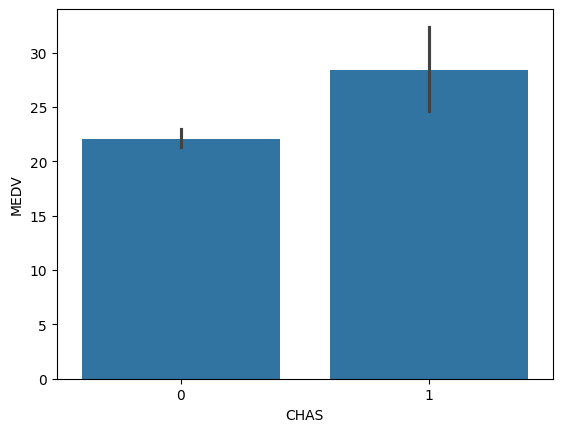

In [50]:
sns.barplot(data=df, x= "CHAS", y="MEDV");

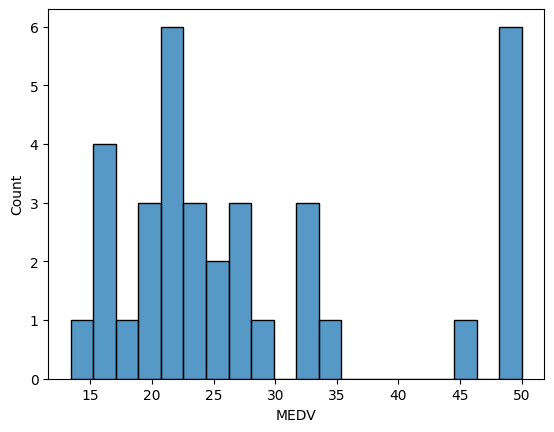

In [55]:
sns.histplot(data=df[df["CHAS"] == 1], x="MEDV", bins=20);

In [ ]:
People are more likely to pay to the houses near river.

## NOX

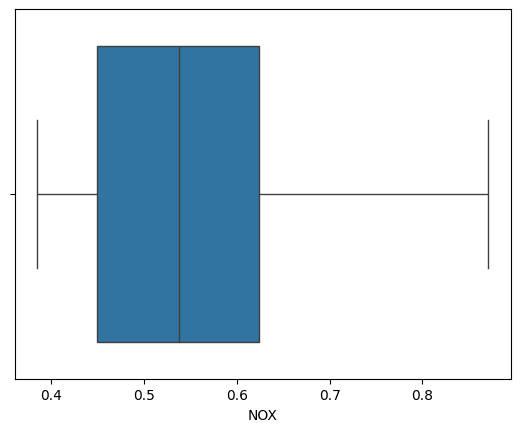

In [56]:
sns.boxplot(data=df, x="NOX");

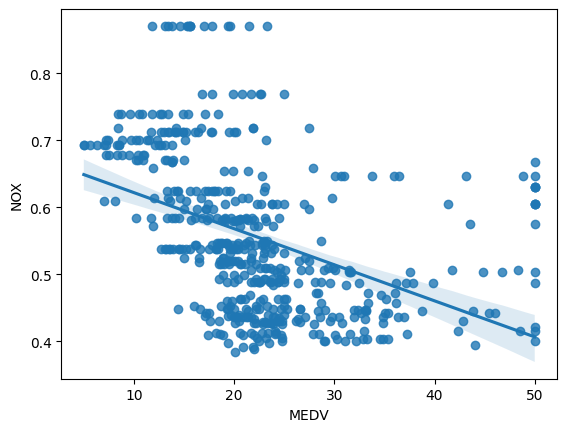

In [58]:
sns.regplot(data=df, x="MEDV", y="NOX");

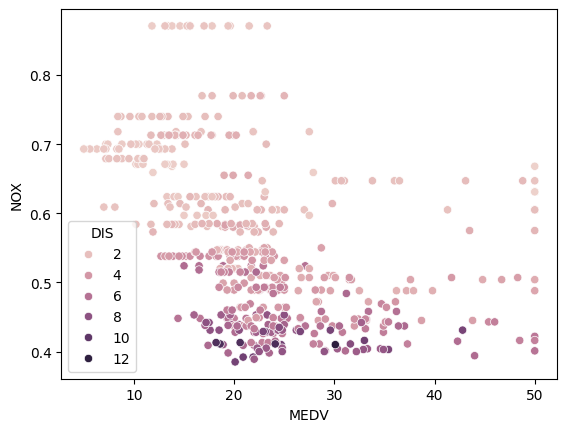

In [141]:
sns.scatterplot(data=df, x="MEDV", y="NOX", hue="DIS");

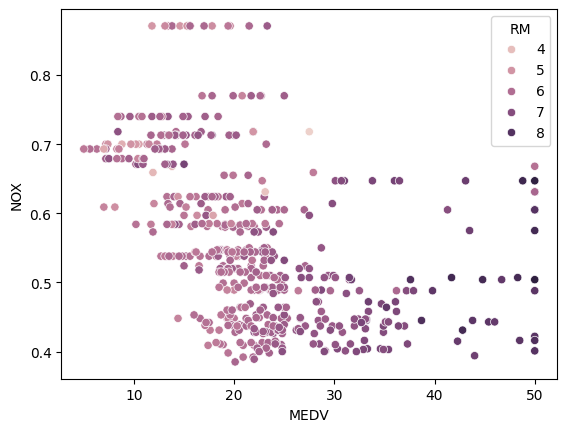

In [142]:
sns.scatterplot(data=df, x="MEDV", y="NOX", hue="RM");

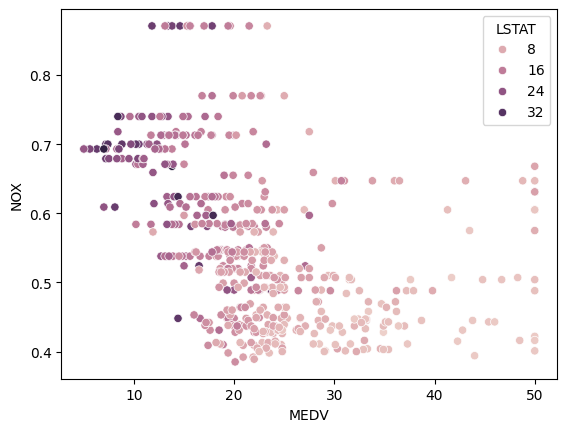

In [145]:
sns.scatterplot(data=df, x="MEDV", y="NOX", hue="LSTAT");

We can conclude that there is negative relation between air pollution and house prices.
But why do people live in more polluted areas?
People who has lower economic standars tend to live in more polluted areas with lower house prices.

## RM

In [60]:
df.RM.value_counts()

RM
5.713    3
6.167    3
6.127    3
6.229    3
6.405    3
        ..
5.859    1
6.416    1
5.572    1
5.880    1
6.976    1
Name: count, Length: 446, dtype: int64

<Axes: xlabel='RM'>

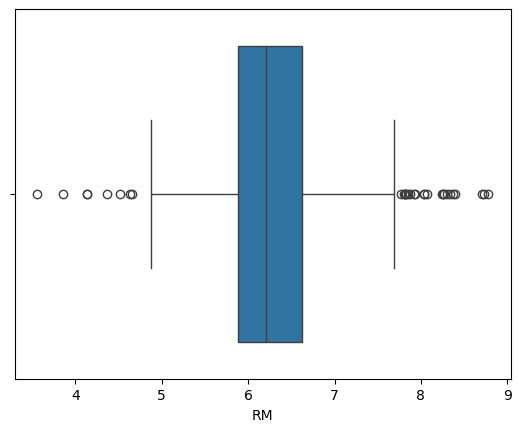

In [63]:
sns.boxplot(data=df, x="RM")

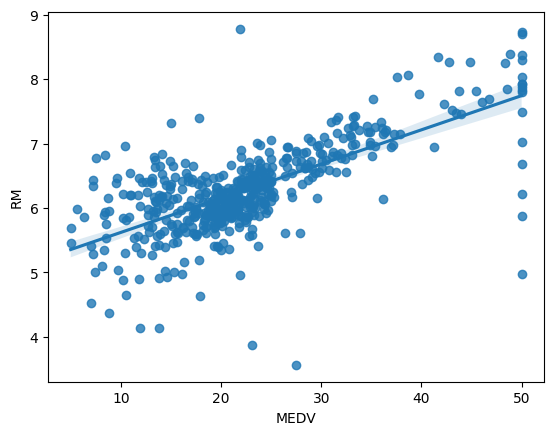

In [146]:
sns.regplot(data=df, y="RM", x="MEDV");

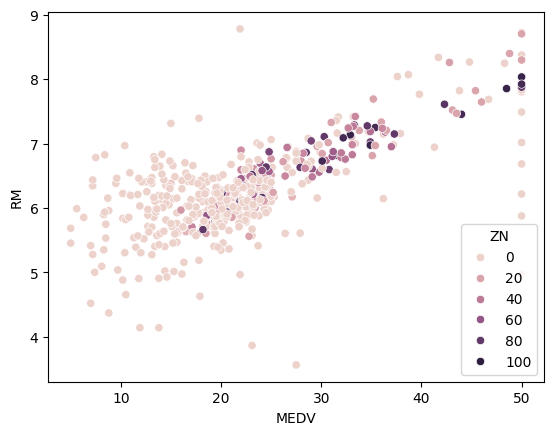

In [149]:
sns.scatterplot(data=df, y="RM", x="MEDV", hue="ZN");

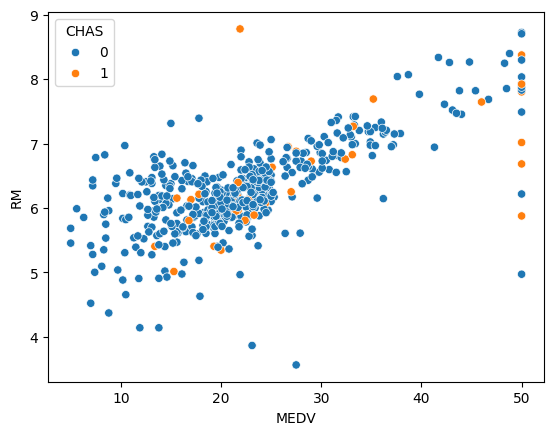

In [154]:
sns.scatterplot(data=df, y="RM", x="MEDV", hue="CHAS");

In [160]:
df.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,MEDV_LEVEL,Tax Category
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296.0,15.3,396.9,4.98,24.0,MEDIUM,251-500


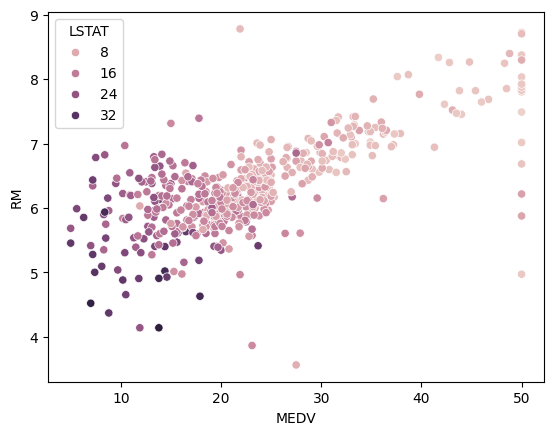

In [166]:
sns.scatterplot(data=df, y="RM", x="MEDV", hue="LSTAT");

The most significant relation in the dataset is between room numbers and house prices.
And as expected, as the zone gets bigger room numbers do so.
The houses with highest price but less rooms attracts our attention. One reason can be they are by the lake. Another is their suburbs are economically better to compared to many other suburbs.

## AGE

<Axes: xlabel='AGE'>

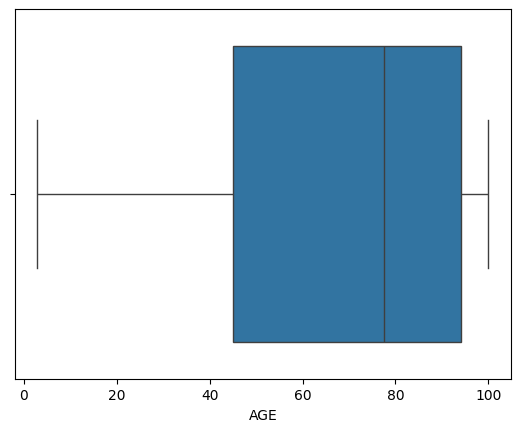

In [64]:
sns.boxplot(data=df, x="AGE")

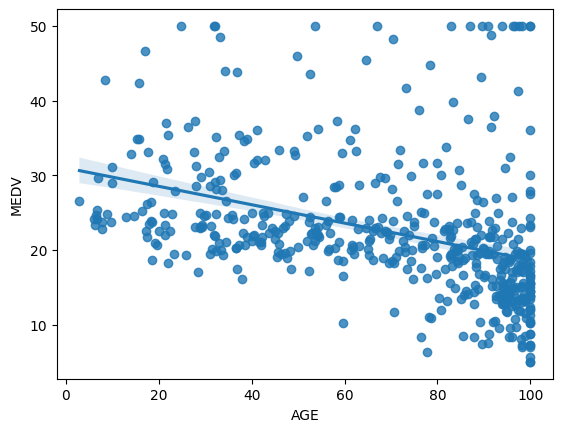

In [65]:
sns.regplot(data=df, y="MEDV", x="AGE");

## DIS

<Axes: xlabel='DIS'>

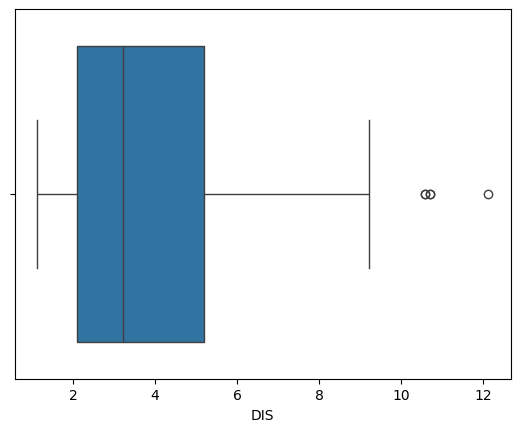

In [67]:
sns.boxplot(data=df, x="DIS")

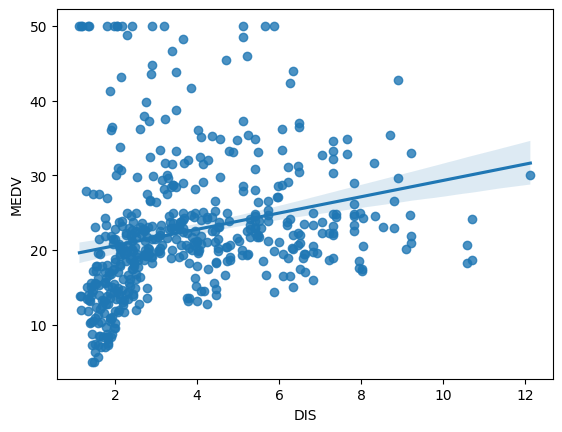

In [68]:
sns.regplot(data=df, y="MEDV", x="DIS");

Houses are generally close to employment center

## RAD

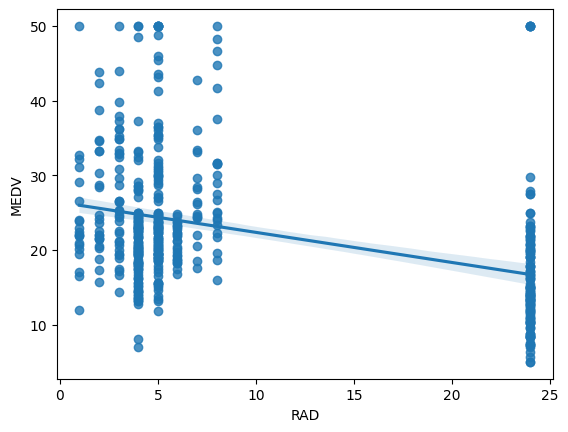

In [69]:
sns.regplot(data=df, y="MEDV", x="RAD");

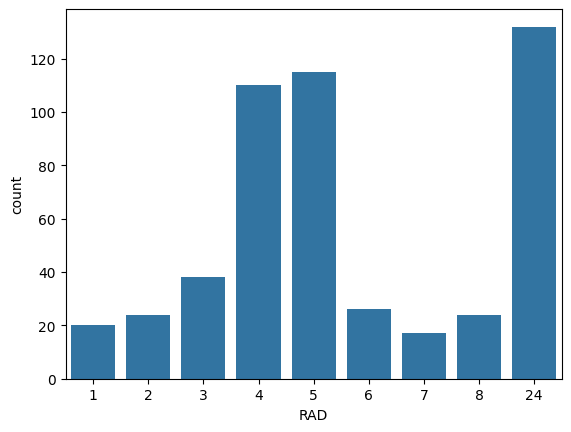

In [72]:
sns.countplot(data=df, x="RAD");

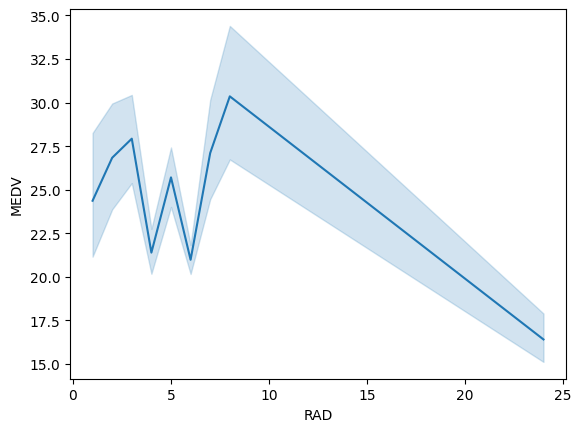

In [70]:
sns.lineplot(data=df, y="MEDV", x="RAD");

## TAX

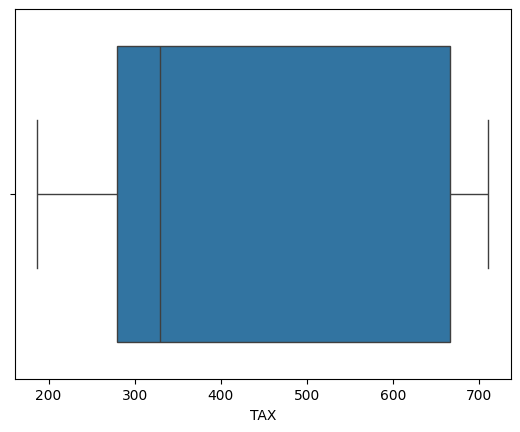

In [74]:
sns.boxplot(data=df, x="TAX");

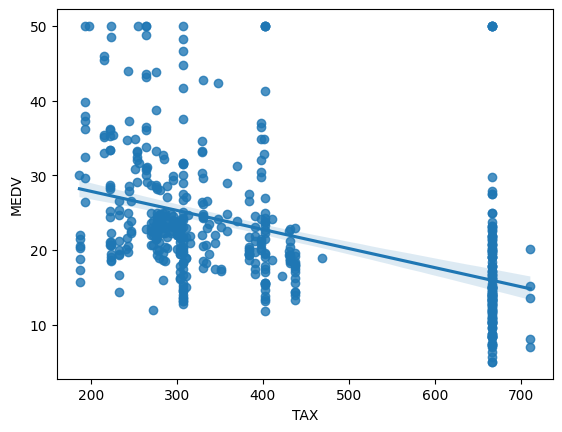

In [75]:
sns.regplot(data=df, y="MEDV", x="TAX");

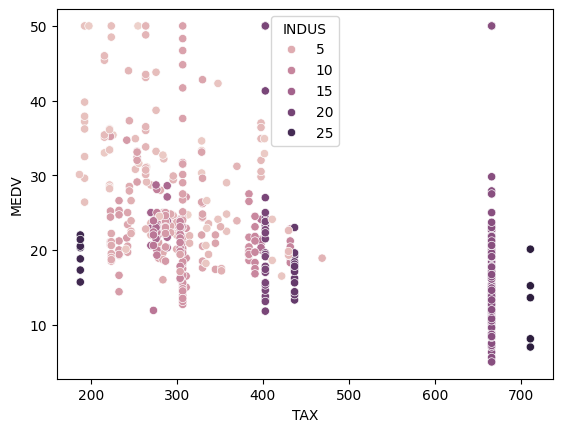

In [78]:
sns.scatterplot(data=df, y="MEDV", x="TAX", hue="INDUS");

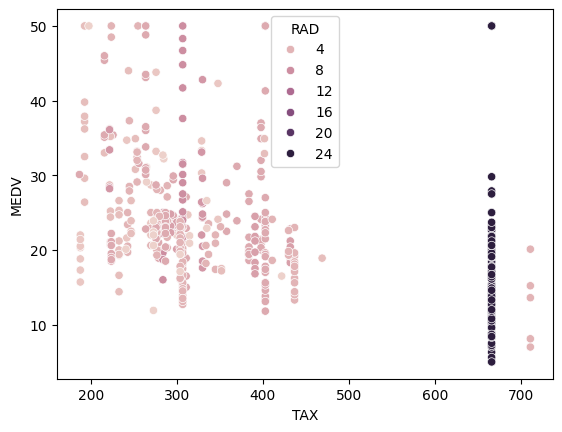

In [79]:
sns.scatterplot(data=df, y="MEDV", x="TAX", hue="RAD");

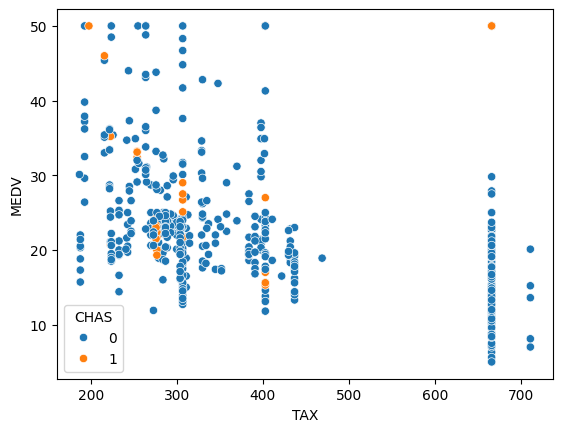

In [80]:
sns.scatterplot(data=df, y="MEDV", x="TAX", hue="CHAS");

## PTRATIO

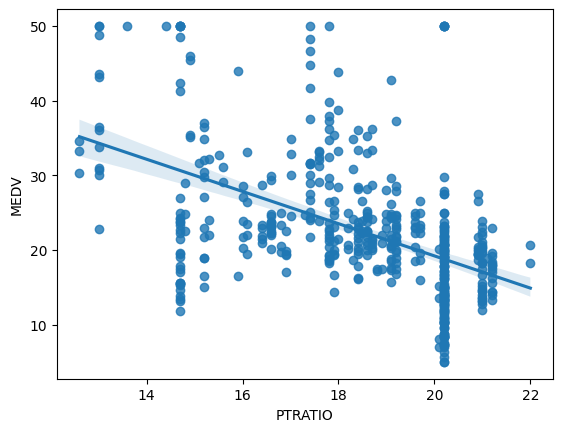

In [81]:
sns.regplot(data=df, y="MEDV", x="PTRATIO");

## B

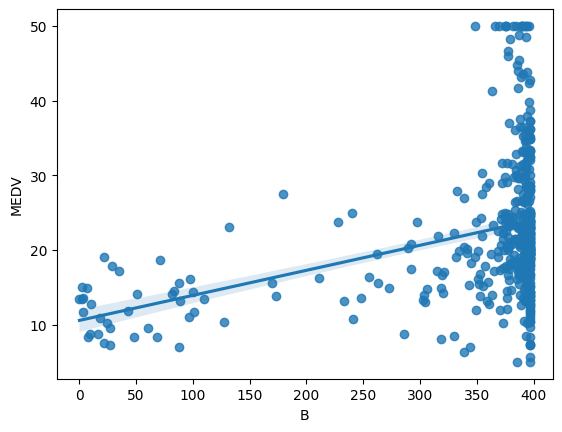

In [82]:
sns.regplot(data=df, y="MEDV", x="B");

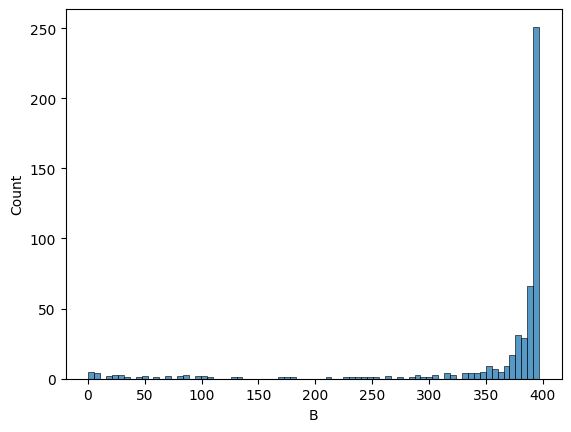

In [83]:
sns.histplot(data=df, x="B");

## LSTAT

<Axes: xlabel='LSTAT'>

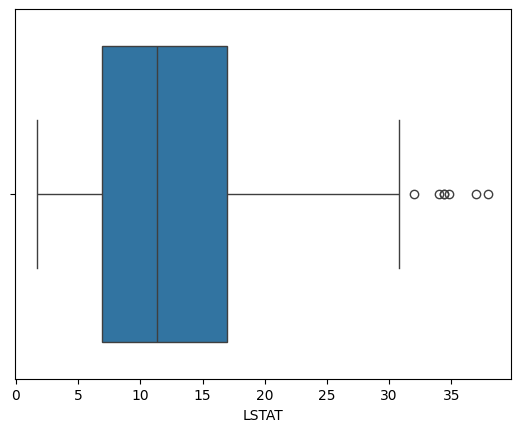

In [85]:
sns.boxplot(data=df, x="LSTAT")

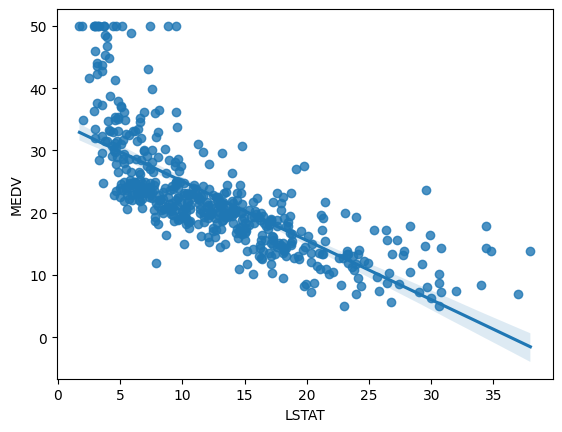

In [84]:
sns.regplot(data=df, y="MEDV", x="LSTAT");

In [66]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [86]:
df.MEDV.value_counts()

MEDV
50.0    16
25.0     8
22.0     7
21.7     7
23.1     7
        ..
32.9     1
34.6     1
30.3     1
33.3     1
8.1      1
Name: count, Length: 229, dtype: int64

In [93]:
def level(x):
    if x < 18:
        return "LOW"
    elif x >= 18 and x <= 38:
        return "MEDIUM"
    else:
        return "HIGH"

In [96]:
df["MEDV_LEVEL"] = df.MEDV.transform(level)

## BIVARIARATE

<Axes: xlabel='LSTAT', ylabel='MEDV'>

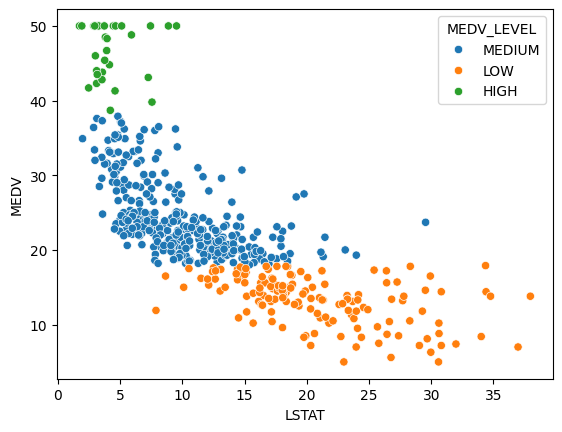

In [100]:
sns.scatterplot(data=df, x="LSTAT", y= "MEDV", hue="MEDV_LEVEL")

<Axes: xlabel='NOX', ylabel='INDUS'>

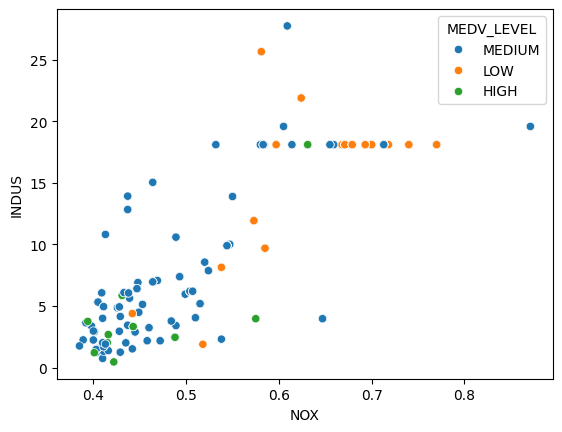

In [101]:
sns.scatterplot(data=df, x="NOX", y= "INDUS", hue="MEDV_LEVEL")

<Axes: xlabel='RAD', ylabel='TAX'>

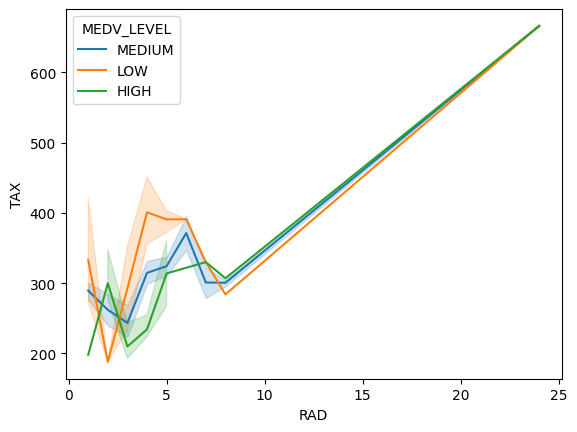

In [103]:
sns.lineplot(data=df, x="RAD", y= "TAX", hue="MEDV_LEVEL")

<Axes: xlabel='LSTAT', ylabel='B'>

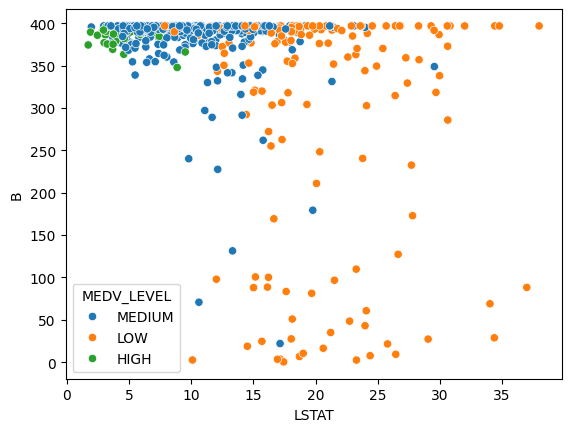

In [106]:
sns.scatterplot(data=df, x="LSTAT", y= "B", hue="MEDV_LEVEL")

<Axes: xlabel='RM', ylabel='LSTAT'>

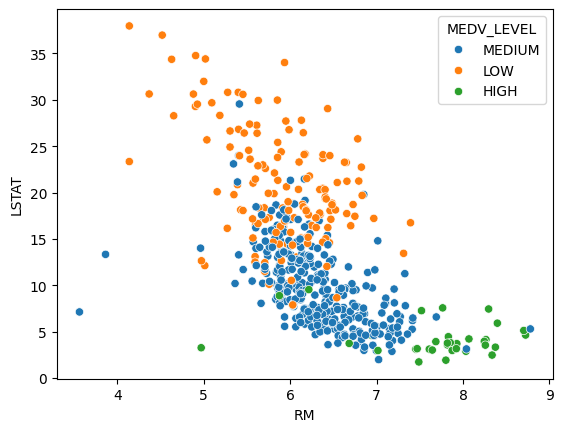

In [109]:
sns.scatterplot(data=df, x="RM", y= "LSTAT", hue="MEDV_LEVEL")

<Axes: xlabel='NOX', ylabel='DIS'>

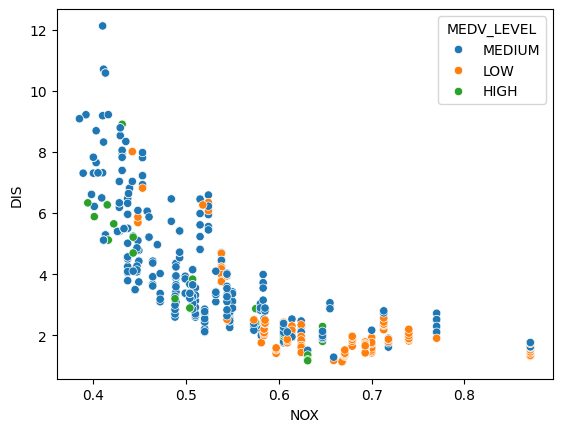

In [107]:
sns.scatterplot(data=df, x="NOX", y= "DIS", hue="MEDV_LEVEL")

<Axes: xlabel='INDUS', ylabel='DIS'>

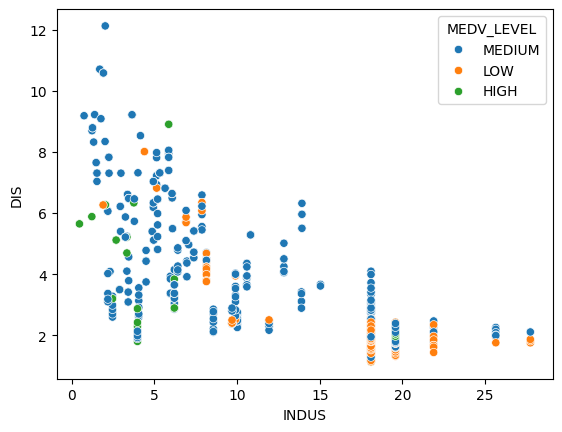

In [108]:
sns.scatterplot(data=df, x="INDUS", y= "DIS", hue="MEDV_LEVEL")

In [111]:
df.TAX.value_counts()

TAX
666.0    132
307.0     40
403.0     30
437.0     15
304.0     14
        ... 
285.0      1
198.0      1
256.0      1
244.0      1
313.0      1
Name: count, Length: 66, dtype: int64

In [117]:
tax_bins = [0, 250, 500, 750, 1000, float('inf')]
tax_labels = ['0-250', '251-500', '501-750', '751-1000', '1001+']
df['Tax Category'] = pd.cut(df['TAX'], bins=tax_bins, labels=tax_labels, right=False)

In [114]:
median_house_value_by_tax = df.groupby('Tax Category')['MEDV'].median()
print(median_house_value_by_tax)

Tax Category
0-250       25.2
251-500     22.6
501-750     14.3
751-1000     NaN
1001+        NaN
Name: MEDV, dtype: float64


/tmp/ipykernel_5964/1468967767.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_house_value_by_tax = df.groupby('Tax Category')['MEDV'].median()


<Axes: xlabel='MEDV', ylabel='LSTAT'>

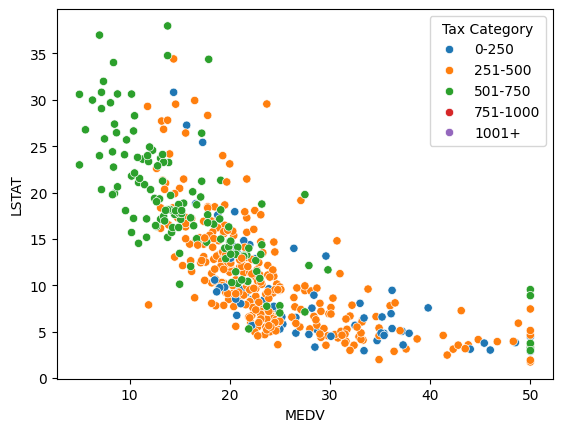

In [118]:
sns.scatterplot(data=df, x="MEDV", y= "LSTAT", hue="Tax Category")

<Axes: xlabel='MEDV', ylabel='RM'>

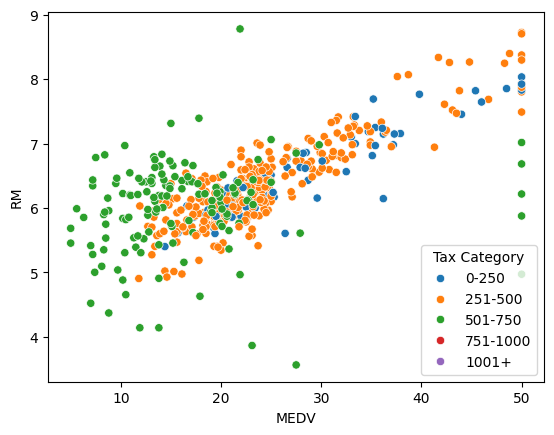

In [119]:
sns.scatterplot(data=df, x="MEDV", y= "RM", hue="Tax Category")

In [104]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,MEDV_LEVEL
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,MEDIUM
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,MEDIUM
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,MEDIUM
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,MEDIUM
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,MEDIUM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4,MEDIUM
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6,MEDIUM
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9,MEDIUM
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0,MEDIUM
